<a href="https://colab.research.google.com/github/akselhakim/App/blob/API/Chess_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://developer.

In [6]:
pip install chess

In [7]:
%load_ext autoreload
%autoreload 2


In [8]:
!pip install --upgrade git+https://github.com/arjangroen/RLC  # RLC is the Reinforcement Learning package



  Cloning https://github.com/arjangroen/RLC to /tmp/pip-req-build-5mbnw423
  Running command git clone -q https://github.com/arjangroen/RLC /tmp/pip-req-build-5mbnw423
  Created wheel for RLC: filename=RLC-0.3-cp37-none-any.whl size=22570 sha256=4c12b5483ef9e25864a859ca7a98e0854cb2b9928784a342c65779b1729180ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-l63ek_ba/wheels/fe/9e/11/db47d37f8f580d9fe03dd1b3b8299764a6591389f45d71666e
Successfully built RLC
  Found existing installation: RLC 0.3
    Uninstalling RLC-0.3:
      Successfully uninstalled RLC-0.3


# New Section

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import os
import inspect
import matplotlib.pyplot as plt


In [10]:
from keras.models import load_model

In [12]:
import os

In [13]:
from RLC.real_chess import agent, environment, learn, tree
import chess
from chess.pgn import Game


opponent = agent.GreedyAgent()
env = environment.Board(opponent, FEN=None)
player = agent.Agent(lr=0.0005,network='big')
learner = learn.TD_search(env, player,gamma=0.9,search_time=0.9)
node = tree.Node(learner.env.board, gamma=learner.gamma)
player.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state (InputLayer)              [(None, 8, 8, 8)]    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 8, 8, 4)      36          state[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 8)      264         state[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 3, 3, 12)     876         state[0][0]                      
____________________________________________________________________________________________

In [16]:
n_iters = 10000  # maximum number of iterations
timelimit = 60 # maximum time for learning
network_replacement_interval = 10  # For the stability of the nearal network updates, the network is not continuously replaced

iter 0
game ended with result 0.0 and material balance -5.0 in 81 halfmoves


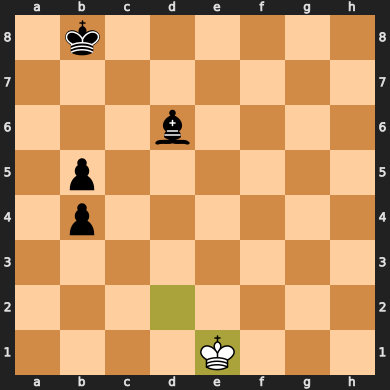

In [17]:
learner.learn(iters=n_iters,timelimit_seconds=timelimit,c=network_replacement_interval) 

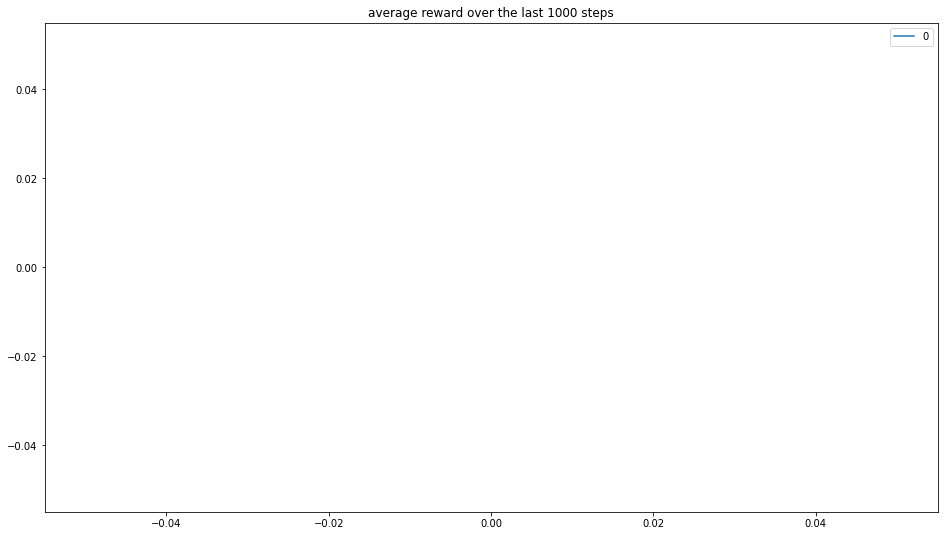

In [18]:
reward_smooth = pd.DataFrame(learner.reward_trace)
reward_smooth.rolling(window=1000,min_periods=1000).mean().plot(figsize=(16,9),title='average reward over the last 1000 steps')
plt.show()

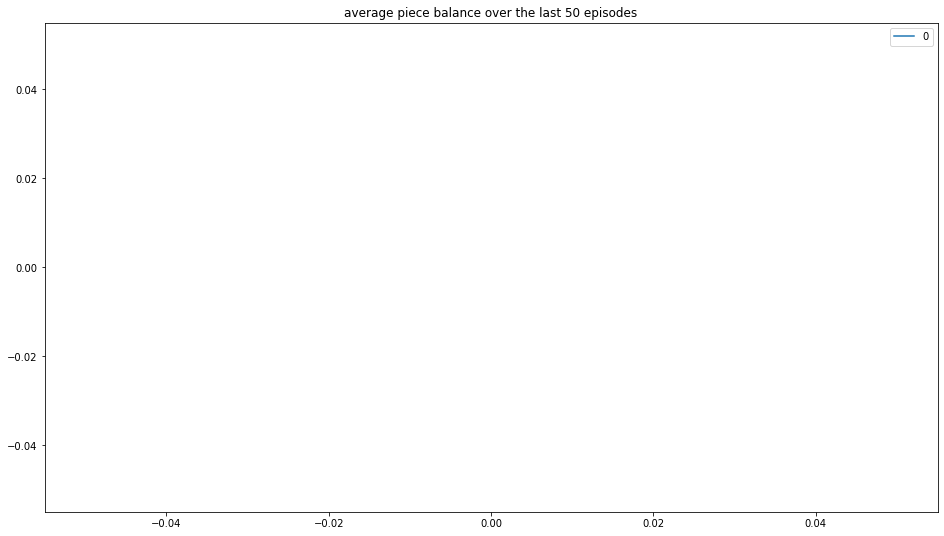

In [20]:
reward_smooth = pd.DataFrame(learner.piece_balance_trace)
reward_smooth.rolling(window=50,min_periods=50).mean().plot(figsize=(16,9),title='average piece balance over the last 50 episodes')
plt.show()

In [27]:
learner.env.reset()
learner.search_time = 60
learner.temperature = 1/3

game ended with result 0.0 and material balance 0.0 in 2 halfmoves


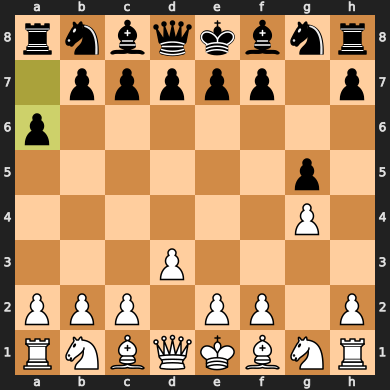

In [29]:
learner.play_game(n_iters,maxiter=1)